# Importing the libraries

!pip install feature-engine

In [2]:
# importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


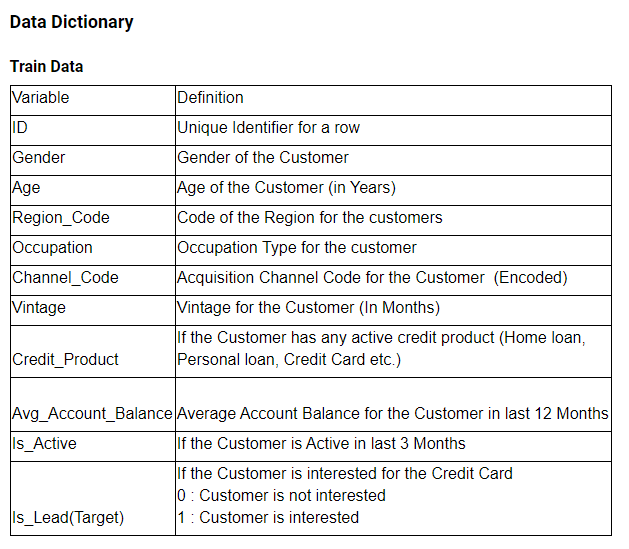

##Cleaning Train data

In [4]:
# reading the csv file
train_data = pd.read_csv("https://raw.githubusercontent.com/Kanikaitbhu/Data-Files/main/train_s3TEQDk.csv")

# EDA

In [5]:
# top 5 rows of the data
train_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [6]:
# data spread of continuos variables
train_data.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [7]:
# correlation between the continuous variables
train_data.corr()

,Age,Vintage,Avg_Account_Balance,Is_Lead
Age,1.000000,0.631242,0.145232,0.230814
Vintage,0.631242,1.000000,0.167433,0.279642
Avg_Account_Balance,0.145232,0.167433,1.000000,0.053370
Is_Lead,0.230814,0.279642,0.053370,1.000000


In [8]:
# checking for null values
train_data.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [9]:
# dimension of the data
train_data.shape

(245725, 11)

In [10]:
# ratio of Null Values
train_data.Credit_Product.isnull().sum()*100/ len(train_data)

11.9340726421813

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [12]:
# unique values in Credit_Product column
train_data.Credit_Product.unique()

array(['No', nan, 'Yes'], dtype=object)

In [13]:
# dropping the ID  column
train_data = train_data.drop(["ID"], axis =1)

###  Understanding Data Distribution

## Categorical data - Gender, Occupation, Channel_code, Credit_Product for people who are interested

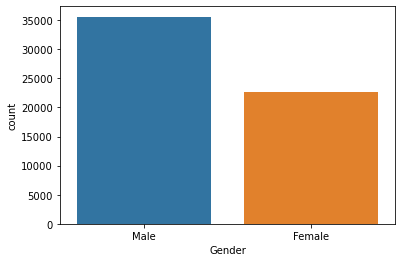

In [16]:
sns.countplot("Gender", data= train_data[train_data["Is_Lead"]==1])

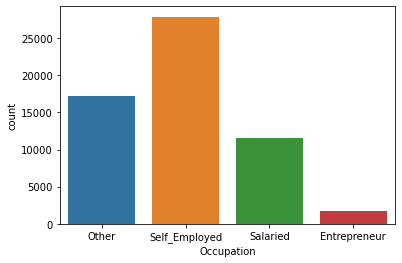

In [17]:
sns.countplot("Occupation", data= train_data[train_data["Is_Lead"]==1])

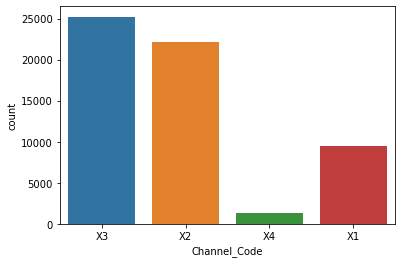

In [18]:
sns.countplot("Channel_Code", data= train_data[train_data["Is_Lead"]==1])

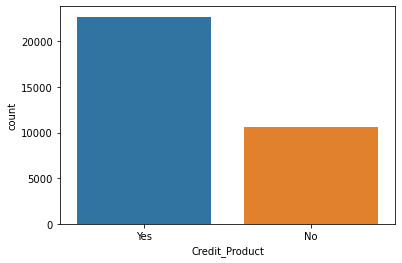

In [19]:
sns.countplot("Credit_Product", data= train_data[train_data["Is_Lead"]==1])

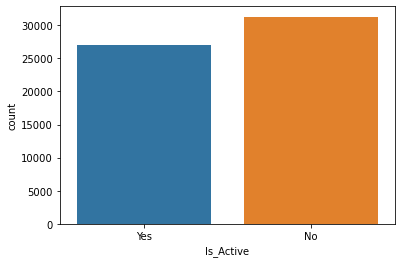

In [20]:
sns.countplot("Is_Active", data= train_data[train_data["Is_Lead"]==1])

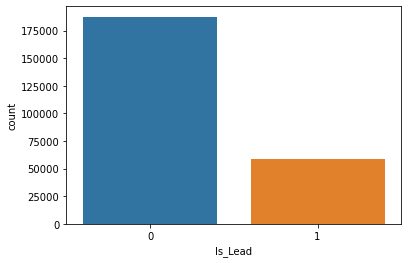

In [21]:
# count of people who are interested
sns.countplot("Is_Lead", data= train_data)

In [22]:
## Continous variable distribution

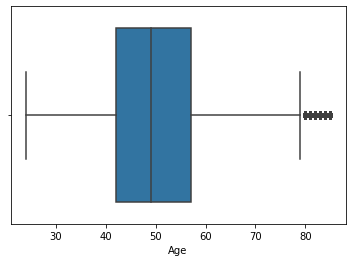

In [23]:
sns.boxplot("Age", data= train_data[train_data["Is_Lead"]==1])

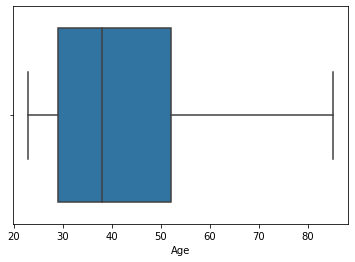

In [24]:
sns.boxplot("Age", data= train_data[train_data["Is_Lead"]==0])

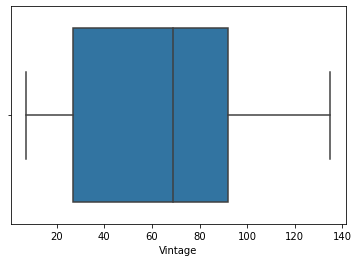

In [25]:
# distribution of the Vintage
sns.boxplot("Vintage", data= train_data[train_data["Is_Lead"]==1])

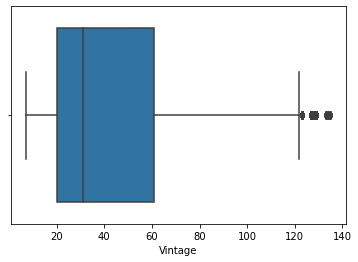

In [26]:
sns.boxplot("Vintage", data= train_data[train_data["Is_Lead"]==0])

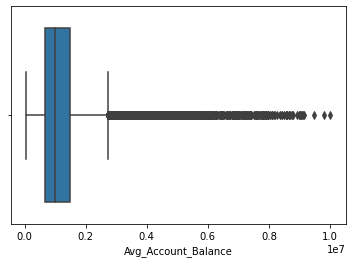

In [27]:
sns.boxplot("Avg_Account_Balance", data= train_data[train_data["Is_Lead"]==1])

(array([3.1398e+04, 2.0045e+04, 4.5420e+03, 1.4160e+03, 4.6800e+02,
        2.0600e+02, 1.0100e+02, 7.6000e+01, 2.8000e+01, 8.0000e+00]),
 array([   45950. ,  1042122.8,  2038295.6,  3034468.4,  4030641.2,
         5026814. ,  6022986.8,  7019159.6,  8015332.4,  9011505.2,
        10007678. ]),
 <a list of 10 Patch objects>)

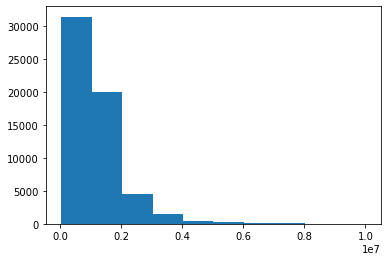

In [28]:
plt.hist("Avg_Account_Balance", data= train_data[train_data["Is_Lead"]==1])

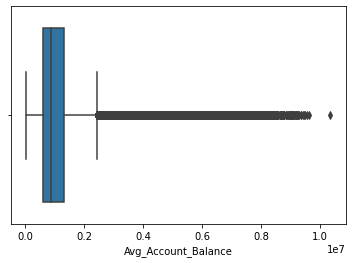

In [29]:
sns.boxplot("Avg_Account_Balance", data= train_data[train_data["Is_Lead"]==0])

(array([1.16729e+05, 5.38390e+04, 1.10040e+04, 3.49700e+03, 1.17000e+03,
        5.42000e+02, 3.33000e+02, 2.14000e+02, 1.01000e+02, 8.00000e+00]),
 array([   20790. ,  1053911.9,  2087033.8,  3120155.7,  4153277.6,
         5186399.5,  6219521.4,  7252643.3,  8285765.2,  9318887.1,
        10352009. ]),
 <a list of 10 Patch objects>)

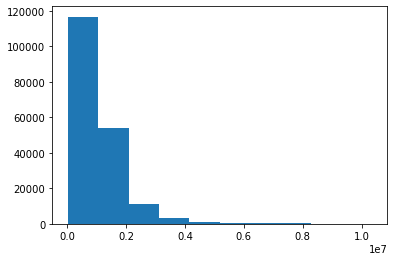

In [30]:
plt.hist("Avg_Account_Balance", data= train_data[train_data["Is_Lead"]==0])

# Feature Engineering

### Account balance 
#### Account balance has a very skewed distribution and hence capped the right tail

In [31]:
from feature_engine.outliers import Winsorizer
capper = Winsorizer(capping_method='gaussian', tail='right', fold=3, variables=['Avg_Account_Balance'])
capper.fit(train_data)

Winsorizer(variables=['Avg_Account_Balance'])

In [32]:
train_data = capper.transform(train_data)

In [33]:
max(train_data["Avg_Account_Balance"])

3687212.169227292

(array([14074., 61744., 47815., 26502., 14537.,  8376.,  4606.,  2969.,
         1904.,  4910.]),
 array([  20790.        ,  387432.21692273,  754074.43384546,
        1120716.65076819, 1487358.86769092, 1854001.08461365,
        2220643.30153637, 2587285.5184591 , 2953927.73538183,
        3320569.95230456, 3687212.16922729]),
 <a list of 10 Patch objects>)

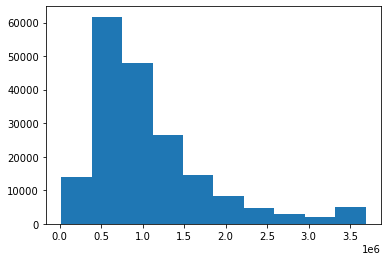

In [34]:
plt.hist("Avg_Account_Balance", data= train_data[train_data["Is_Lead"]==0])

In [35]:
capper.right_tail_caps_

{'Avg_Account_Balance': 3687212.169227292}

### Region_Code
### target encoding for the region code

In [37]:
### Target encoding using mean of the respondant variable
train_data.groupby(['Region_Code'])['Is_Lead'].mean()

Region_Code
RG250    0.157452
RG251    0.232101
RG252    0.138124
RG253    0.258881
RG254    0.212854
RG255    0.232408
RG256    0.140850
RG257    0.191772
RG258    0.220400
RG259    0.193735
RG260    0.190997
RG261    0.167955
RG262    0.180649
RG263    0.221861
RG264    0.137129
RG265    0.258732
RG266    0.139417
RG267    0.148965
RG268    0.299800
RG269    0.221671
RG270    0.144301
RG271    0.169261
RG272    0.219916
RG273    0.237714
RG274    0.164964
RG275    0.167334
RG276    0.277858
RG277    0.231951
RG278    0.219539
RG279    0.225604
RG280    0.235538
RG281    0.218732
RG282    0.192143
RG283    0.302047
RG284    0.301035
Name: Is_Lead, dtype: float64

In [38]:
Mean_encoded_region = train_data.groupby(['Region_Code'])['Is_Lead'].mean().to_dict()
train_data['Region_Code'] =  train_data['Region_Code'].map(Mean_encoded_region)
train_data

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,0.299800,Other,X3,43,No,1045696.0,No,0
1,Female,30,0.231951,Salaried,X1,32,No,581988.0,No,0
2,Female,56,0.299800,Self_Employed,X3,26,No,1484315.0,Yes,0
3,Male,34,0.144301,Salaried,X1,19,No,470454.0,No,0
4,Female,30,0.192143,Salaried,X1,33,No,886787.0,No,0
...,...,...,...,...,...,...,...,...,...,...
245720,Male,51,0.301035,Self_Employed,X3,109,NaN,1925586.0,No,0
245721,Male,27,0.299800,Salaried,X1,15,No,862952.0,Yes,0
245722,Female,26,0.218732,Salaried,X1,13,No,670659.0,No,0
245723,Female,28,0.237714,Salaried,X1,31,No,407504.0,No,0


## AGE
### Creating bins for the age to avoid overfitting

In [40]:
#Creating bins and labels for the Age variable
bins = [20,30,40,50,60,85]
labels = ['twentys','thirtys','fortys','fiftys', 'retired']
train_data['Age'] = pd.cut(train_data['Age'],bins = bins, labels = labels)

In [41]:
train_data

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,retired,0.299800,Other,X3,43,No,1045696.0,No,0
1,Female,twentys,0.231951,Salaried,X1,32,No,581988.0,No,0
2,Female,fiftys,0.299800,Self_Employed,X3,26,No,1484315.0,Yes,0
3,Male,thirtys,0.144301,Salaried,X1,19,No,470454.0,No,0
4,Female,twentys,0.192143,Salaried,X1,33,No,886787.0,No,0
...,...,...,...,...,...,...,...,...,...,...
245720,Male,fiftys,0.301035,Self_Employed,X3,109,NaN,1925586.0,No,0
245721,Male,twentys,0.299800,Salaried,X1,15,No,862952.0,Yes,0
245722,Female,twentys,0.218732,Salaried,X1,13,No,670659.0,No,0
245723,Female,twentys,0.237714,Salaried,X1,31,No,407504.0,No,0


In [42]:
## Enconding the binary variables using label encoder
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
train_data["Gender"] = le1.fit_transform(train_data["Gender"])

le4 = LabelEncoder()
train_data["Is_Active"] = le4.fit_transform(train_data["Is_Active"])

Credit_Product = {'No': 0, 'Yes':1, 'Nan': 'Nan'}
train_data["Credit_Product"] = train_data.Credit_Product.map(Credit_Product)

In [43]:
## Enconding the multicategory variables using label encoder
Occupation = pd.get_dummies(train_data.Occupation, prefix='Occupation')
print(Occupation.head())
Occupation = Occupation.drop(["Occupation_Other"], axis =1)

   Occupation_Entrepreneur  Occupation_Other  Occupation_Salaried  \
0                        0                 1                    0   
1                        0                 0                    1   
2                        0                 0                    0   
3                        0                 0                    1   
4                        0                 0                    1   

   Occupation_Self_Employed  
0                         0  
1                         0  
2                         1  
3                         0  
4                         0  


In [44]:
Age = pd.get_dummies(train_data.Age, prefix='Age')
print(Age.head())
Age = Age.drop(["Age_retired"], axis =1)

   Age_twentys  Age_thirtys  Age_fortys  Age_fiftys  Age_retired
0            0            0           0           0            1
1            1            0           0           0            0
2            0            0           0           1            0
3            0            1           0           0            0
4            1            0           0           0            0


In [45]:
Channel_Code = pd.get_dummies(train_data.Channel_Code, prefix='Channel_Code')
print(Channel_Code.head())
Channel_Code = Channel_Code.drop(["Channel_Code_X4"], axis =1)

   Channel_Code_X1  Channel_Code_X2  Channel_Code_X3  Channel_Code_X4
0                0                0                1                0
1                1                0                0                0
2                0                0                1                0
3                1                0                0                0
4                1                0                0                0


In [46]:
train_data = pd.concat([train_data,Channel_Code,Occupation,Age], axis=1)

In [47]:
train_data = train_data.drop(["Occupation","Channel_Code","Age"],axis=1)

In [48]:
train_data

,Gender,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Occupation_Entrepreneur,Occupation_Salaried,Occupation_Self_Employed,Age_twentys,Age_thirtys,Age_fortys,Age_fiftys
0,0,0.299800,43,0,1045696.0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0.231951,32,0,581988.0,0,0,1,0,0,0,1,0,1,0,0,0
2,0,0.299800,26,0,1484315.0,1,0,0,0,1,0,0,1,0,0,0,1
3,1,0.144301,19,0,470454.0,0,0,1,0,0,0,1,0,0,1,0,0
4,0,0.192143,33,0,886787.0,0,0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,1,0.301035,109,NaN,1925586.0,0,0,0,0,1,0,0,1,0,0,0,1
245721,1,0.299800,15,0,862952.0,1,0,1,0,0,0,1,0,1,0,0,0
245722,0,0.218732,13,0,670659.0,0,0,1,0,0,0,1,0,1,0,0,0
245723,0,0.237714,31,0,407504.0,0,0,1,0,0,0,1,0,1,0,0,0


## imputing the missing values for the variable credit_Product using KNN Imputer

In [50]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=6)
df = imputer.fit_transform(train_data)

In [51]:
df_1=pd.DataFrame(df)

In [52]:
df_1[3]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
245720    1.0
245721    0.0
245722    0.0
245723    0.0
245724    0.0
Name: 3, Length: 245725, dtype: float64

In [53]:
train_data["Credit_Product"] = df_1[3]

In [54]:
train_data


,Gender,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Occupation_Entrepreneur,Occupation_Salaried,Occupation_Self_Employed,Age_twentys,Age_thirtys,Age_fortys,Age_fiftys
0,0,0.299800,43,0.0,1045696.0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0.231951,32,0.0,581988.0,0,0,1,0,0,0,1,0,1,0,0,0
2,0,0.299800,26,0.0,1484315.0,1,0,0,0,1,0,0,1,0,0,0,1
3,1,0.144301,19,0.0,470454.0,0,0,1,0,0,0,1,0,0,1,0,0
4,0,0.192143,33,0.0,886787.0,0,0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,1,0.301035,109,1.0,1925586.0,0,0,0,0,1,0,0,1,0,0,0,1
245721,1,0.299800,15,0.0,862952.0,1,0,1,0,0,0,1,0,1,0,0,0
245722,0,0.218732,13,0.0,670659.0,0,0,1,0,0,0,1,0,1,0,0,0
245723,0,0.237714,31,0.0,407504.0,0,0,1,0,0,0,1,0,1,0,0,0


In [55]:
list = train_data.columns.to_list()

In [56]:
list

['Gender',
 'Region_Code',
 'Vintage',
 'Credit_Product',
 'Avg_Account_Balance',
 'Is_Active',
 'Is_Lead',
 'Channel_Code_X1',
 'Channel_Code_X2',
 'Channel_Code_X3',
 'Occupation_Entrepreneur',
 'Occupation_Salaried',
 'Occupation_Self_Employed',
 'Age_twentys',
 'Age_thirtys',
 'Age_fortys',
 'Age_fiftys']

In [57]:
# Transforming the variables using MinMax scalar
from sklearn.preprocessing import MinMaxScaler

# Standardizing the features
scaler = MinMaxScaler()
train_data_scaled = pd.DataFrame(scaler.fit_transform(train_data))

In [58]:
train_data_scaled.columns = list

In [59]:
train_data=train_data_scaled

In [60]:
train_data

,Gender,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Occupation_Entrepreneur,Occupation_Salaried,Occupation_Self_Employed,Age_twentys,Age_thirtys,Age_fortys,Age_fiftys
0,0.0,0.986376,0.281250,0.0,0.279538,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.574966,0.195312,0.0,0.153064,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.986376,0.148438,0.0,0.399170,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.043488,0.093750,0.0,0.122644,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.333585,0.203125,0.0,0.236197,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,1.0,0.993868,0.796875,1.0,0.519524,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
245721,1.0,0.986376,0.062500,0.0,0.229696,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
245722,0.0,0.494810,0.046875,0.0,0.177249,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
245723,0.0,0.609912,0.187500,0.0,0.105474,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [61]:
y = train_data["Is_Lead"]

In [62]:
X = train_data.drop(["Is_Lead"], axis = 1)

In [63]:
#training and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100, stratify=y)

In [64]:
#from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_recall_curve
from sklearn.metrics import confusion_matrix,classification_report,f1_score, precision_score, recall_score, roc_curve, auc, average_precision_score, roc_auc_score, accuracy_score, precision_recall_curve, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


#Fitting the model
 
def fit_test_model(model, X_train, y_train, X_test):
    # Train the model
    model.fit(X_train, y_train)
    # Y Hat Prediction on Test Data
    model_pred = model.predict(X_test)
    return model_pred

# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()



# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    #Return the performance metric
    return model_cross

# Function to calculate Accuracy Score
def model_accuracy_score(model, X_train, y_train, X_test):
    model_pred = fit_test_model(model,X_train, y_train, X_test)
    accu_score = accuracy_score(y_test, model_pred)
    return accu_score


# Calculate Confusion Matrix & PLot To Visualize it

def draw_confmatrix(y_test, yhat, str1, str2):
    #Make predictions and evalute
    #model_pred = fit_test_model(model,X_train, y_train, X_test)
    cm = confusion_matrix( y_test, yhat, [0,1] )
    print("Confusion Matrix Is:", cm )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [str1, str2] , yticklabels = [str1, str2] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
# Function to calculate Precision Score For Class 0
def precision_score_class_0(model,X_train, y_train, X_test):
    # Make predictions and evalute
    model_pred = fit_test_model(model,X_train, y_train, X_test)
    # Take turns considering the positive class either 0 or 1
    precision= precision_score(y_test, model_pred, pos_label=0) 
    return precision 

# Function to calculate Precision Score For Class 1
def precision_score_class_1(model,X_train, y_train, X_test):
    # Make predictions and evalute
    model_pred = fit_test_model(model,X_train, y_train, X_test)
    # Take turns considering the positive class either 0 or 1
    precision= precision_score(y_test, model_pred, pos_label=1) 
    return precision 

# Function to calculate Recall Score For Class 0
def recallscore_class_0(model,X_train, y_train, X_test):
    # Make predictions and evalute
    model_pred = fit_test_model(model,X_train, y_train, X_test)
    # Take turns considering the positive class either 0 or 1
    recallscore= recall_score(y_test, model_pred, pos_label=0) 
    return recallscore  

# Function to calculate Recall Score For Class 1
def recallscore_class_1(model,X_train, y_train, X_test):
    # Make predictions and evalute
    model_pred = fit_test_model(model,X_train, y_train, X_test)
    # Take turns considering the positive class either 0 or 1
    recallscore= recall_score(y_test, model_pred, pos_label=1) 
    return recallscore 

# Function to calculate F1 Score For Class 0
def f1score_0(model,X_train, y_train, X_test):
    # Make predictions and evalute
    model_pred = fit_test_model(model,X_train, y_train, X_test)
    # Take turns considering the positive class either 0 or 1
    fscore= f1_score(y_test, model_pred, pos_label=0) 
    return fscore 


# Function to calculate F1 Score For Class 1
def f1score_1(model,X_train, y_train, X_test):
    # Make predictions and evalute
    model_pred = fit_test_model(model,X_train, y_train, X_test)
    # Take turns considering the positive class either 0 or 1
    fscore= f1_score(y_test, model_pred, pos_label=1) 
    return fscore 

#Print Classification Report Metrics
def classificationreport(y_test, yhat):
    # Make predictions and evalute
    #model_pred = fit_test_model(model,X_train, y_train, X_test)
    class_report= classification_report(y_test, yhat)
    return class_report 

#Function To plot ROC Curve: For Given Model
def roc_auc_curve(model, X_test,TITLE):
    # predict probabilities
    probs = model.predict_proba(X_test)[:,1]
    # Calculating roc_auc score
    rocauc = roc_auc_score(y_test, probs)
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plt.figure(figsize=(10,10))
    plt.title(TITLE)
    plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % rocauc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
def prec_recall_curve(model,X_train, y_train, X_test, STR):   
    # predict probabilities
    probs = model.predict_proba(X_test)[:,1]
    # predict class values
    yhat = fit_test_model(model,X_train, y_train, X_test)
    #calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    # calculate F1 score
    f1 = f1_score(y_test, yhat)
   #calculate precision-recall AUC
    aucscore = auc(recall, precision)
    # calculate average precision score
    ap = average_precision_score(y_test, probs)
    print('f1=%.3f auc=%.3f ap=%.3f' % (f1, aucscore, ap))
    # plot no skill
    plt.figure(figsize=(10,10))
    plt.title(STR)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    # plot the precision-recall curve for the model
    plt.plot(recall, precision, marker='.')
    # show the plot
    plt.show()

# Base Models

## Logistic Regression

Accuracy Score Is :  0.693397090243158
LogisticRegression F1 score = 0.5369676110872104
LogisticRegression classification Score = 
               precision    recall  f1-score   support

         0.0       0.90      0.68      0.77     37487
         1.0       0.42      0.75      0.54     11658

    accuracy                           0.69     49145
   macro avg       0.66      0.71      0.65     49145
weighted avg       0.78      0.69      0.72     49145



C:\Users\kanik\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Confusion Matrix Is: [[25340 12147]
 [ 2921  8737]]


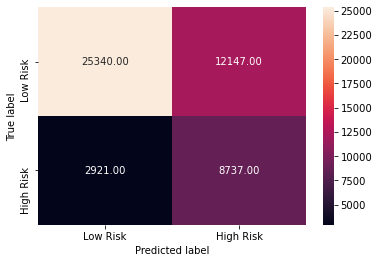

In [65]:
lr = LogisticRegression(class_weight="balanced", penalty= 'l1', solver= 'liblinear' )
lr.fit(X_train, y_train)
yhat= lr.predict(X_test)

print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
print(lr.__class__.__name__, 'F1 score =', f1_score(y_test, yhat))
print(lr.__class__.__name__, 'classification Score =','\n', classification_report(y_test, yhat))
draw_confmatrix(y_test, yhat, "Low Risk", "High Risk")

In [66]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,yhat))

0.7127050558747368


# using Grid Search to get the paramameters giving highest accuracy
param_dist = {"penalty": ["l1", "l2", "elasticnet", "none"],
              "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}

lr_CV= GridSearchCV(lr, param_dist)
lr_CV.fit(X_train,y_train)
lr_CV.best_params_

## KNN Model

Accuracy Score Is :  0.829219656119646
LogisticRegression F1 score = 0.5481074678296453
LogisticRegression classification Score = 
               precision    recall  f1-score   support

         0.0       0.84      0.95      0.89     37487
         1.0       0.74      0.44      0.55     11658

    accuracy                           0.83     49145
   macro avg       0.79      0.69      0.72     49145
weighted avg       0.82      0.83      0.81     49145



C:\Users\kanik\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Confusion Matrix Is: [[35662  1825]
 [ 6568  5090]]


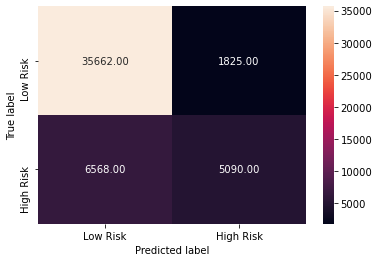

In [67]:
knn = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p= 2)
knn.fit(X_train, y_train)
yhat= knn.predict(X_test)

print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
print(lr.__class__.__name__, 'F1 score =', f1_score(y_test, yhat))
print(lr.__class__.__name__, 'classification Score =','\n', classification_report(y_test, yhat))
draw_confmatrix(y_test, yhat, "Low Risk", "High Risk")

In [68]:
print(roc_auc_score(y_test,yhat))

0.6939632547769531


params = {'n_neighbors': [3, 5, 7, 9, 11],
             "algorithm":["auto", "ball_tree", "kd_tree", "brute"],
              "p":[1,2,3]}
KN_CV = GridSearchCV(knn,params)   
KN_CV.fit(X_train, y_train)
KN_CV.best_params_

y_pred_new_threshold = (knn.predict_proba(X_test)[:,1]>=0.25).astype(int)
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred_new_threshold))
print("Accuracy Score Is : ", accuracy_score(y_test, y_pred_new_threshold))
print(lr.__class__.__name__, 'F1 score =', f1_score(y_test, y_pred_new_threshold))
print(lr.__class__.__name__, 'classification Score =','\n', classification_report(y_test, y_pred_new_threshold))
draw_confmatrix(y_test, y_pred_new_threshold, "Low Risk", "High Risk")

## Naive Bayes Model

Accuracy Score Is :  0.6676365856139994
LogisticRegression F1 score = 0.4772116246319293
LogisticRegression classification Score = 
               precision    recall  f1-score   support

         0.0       0.86      0.68      0.76     37487
         1.0       0.38      0.64      0.48     11658

    accuracy                           0.67     49145
   macro avg       0.62      0.66      0.62     49145
weighted avg       0.74      0.67      0.69     49145



C:\Users\kanik\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Confusion Matrix Is: [[25356 12131]
 [ 4203  7455]]


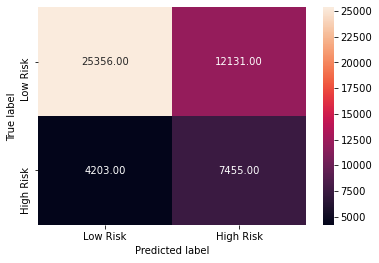

In [69]:
NB = GaussianNB()
NB.fit(X_train, y_train)
yhat= NB.predict(X_test)

print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
print(lr.__class__.__name__, 'F1 score =', f1_score(y_test, yhat))
print(lr.__class__.__name__, 'classification Score =','\n', classification_report(y_test, yhat))
draw_confmatrix(y_test, yhat, "Low Risk", "High Risk")

In [70]:
print(roc_auc_score(y_test,yhat))

0.6579347610105111


y_pred_new_threshold = (NB.predict_proba(X_test)[:,1]>=0.2).astype(int)
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred_new_threshold))
print("Accuracy Score Is : ", accuracy_score(y_test, y_pred_new_threshold))
print(lr.__class__.__name__, 'F1 score =', f1_score(y_test, y_pred_new_threshold))
print(lr.__class__.__name__, 'classification Score =','\n', classification_report(y_test, y_pred_new_threshold))
draw_confmatrix(y_test, y_pred_new_threshold, "Low Risk", "High Risk")

# Decision Tree

Accuracy Score Is :  0.8482856852172144
LogisticRegression F1 score = 0.575736884033231
LogisticRegression classification Score = 
               precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     37487
         1.0       0.86      0.43      0.58     11658

    accuracy                           0.85     49145
   macro avg       0.85      0.71      0.74     49145
weighted avg       0.85      0.85      0.83     49145



C:\Users\kanik\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Confusion Matrix Is: [[36630   857]
 [ 6599  5059]]


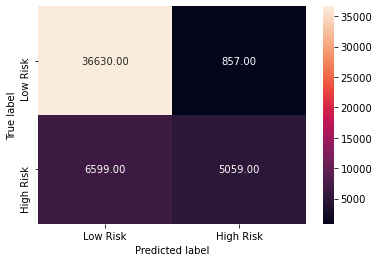

In [71]:
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=5)
dtree.fit(X_train, y_train)
yhat= dtree.predict(X_test)

print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
print(lr.__class__.__name__, 'F1 score =', f1_score(y_test, yhat))
print(lr.__class__.__name__, 'classification Score =','\n', classification_report(y_test, yhat))
draw_confmatrix(y_test, yhat, "Low Risk", "High Risk")

In [72]:
print(roc_auc_score(y_test,yhat))

0.7055448382053168


y_pred_new_threshold = (dtree.predict_proba(X_test)[:,1]>=0.25).astype(int)
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred_new_threshold))
print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
print(lr.__class__.__name__, 'F1 score =', f1_score(y_test, yhat))
print(lr.__class__.__name__, 'classification Score =','\n', classification_report(y_test, yhat))
draw_confmatrix(y_test, yhat, "Low Risk", "High Risk")

# Ensemble Model

## Random Forest - Bagging model

Accuracy Score Is :  0.7680537185878523
LogisticRegression F1 score = 0.04346731559956365
LogisticRegression classification Score = 
               precision    recall  f1-score   support

         0.0       0.77      1.00      0.87     37487
         1.0       1.00      0.02      0.04     11658

    accuracy                           0.77     49145
   macro avg       0.88      0.51      0.46     49145
weighted avg       0.82      0.77      0.67     49145



C:\Users\kanik\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Confusion Matrix Is: [[37487     0]
 [11399   259]]


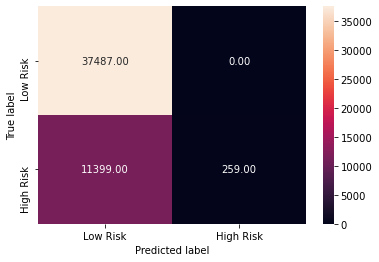

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
yhat= rf.predict(X_test)

print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
print(lr.__class__.__name__, 'F1 score =', f1_score(y_test, yhat))
print(lr.__class__.__name__, 'classification Score =','\n', classification_report(y_test, yhat))
draw_confmatrix(y_test, yhat, "Low Risk", "High Risk")


## Bagging Classifier

In [74]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model_BC = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model_BC.fit(X_train, y_train)
model_BC.score(X_test,y_test)

0.8345915149048734

## AdaBOOST

In [75]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(random_state=1)
model_ada.fit(X_train, y_train)
model_ada.score(X_test,y_test)

0.8480415098178858

## GBoost

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
model_GBM= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model_GBM.fit(X_train, y_train)
model_GBM.score(X_test,y_test)


0.8418353850849527

## XGBOOST

In [77]:
import xgboost as xgb
model_xgb=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model_xgb.fit(X_train, y_train)
model_xgb.score(X_test,y_test)

0.8511547461593244

## CATBOOST

In [78]:
from catboost import CatBoostClassifier
model_cat=CatBoostClassifier()

model_cat.fit(X_train,y_train,eval_set=(X_test, y_test))
model_cat.score(X_test,y_test)

Learning rate set to 0.116792
0:	learn: 0.6059655	test: 0.6055302	best: 0.6055302 (0)	total: 223ms	remaining: 3m 42s
1:	learn: 0.5426106	test: 0.5417599	best: 0.5417599 (1)	total: 264ms	remaining: 2m 11s
2:	learn: 0.4961991	test: 0.4949384	best: 0.4949384 (2)	total: 321ms	remaining: 1m 46s
3:	learn: 0.4642456	test: 0.4626618	best: 0.4626618 (3)	total: 362ms	remaining: 1m 30s
4:	learn: 0.4406112	test: 0.4388444	best: 0.4388444 (4)	total: 400ms	remaining: 1m 19s
5:	learn: 0.4225693	test: 0.4206129	best: 0.4206129 (5)	total: 441ms	remaining: 1m 13s
6:	learn: 0.4095396	test: 0.4074223	best: 0.4074223 (6)	total: 487ms	remaining: 1m 9s
7:	learn: 0.3995067	test: 0.3972371	best: 0.3972371 (7)	total: 528ms	remaining: 1m 5s
8:	learn: 0.3917710	test: 0.3893467	best: 0.3893467 (8)	total: 570ms	remaining: 1m 2s
9:	learn: 0.3861169	test: 0.3836048	best: 0.3836048 (9)	total: 608ms	remaining: 1m
10:	learn: 0.3818210	test: 0.3791916	best: 0.3791916 (10)	total: 649ms	remaining: 58.3s
11:	learn: 0.378496

0.8556109471970699

## LGBMCLASSIFIER

In [79]:
from lightgbm import LGBMClassifier

gbm = LGBMClassifier(random_state=1)

#threshold
threshold = 0.6

# Train on the training data
gbm.fit(X_train, y_train)
predicted_proba = gbm.predict_proba(X_test)

yhat = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y_test, yhat)

In [80]:
accuracy

0.8522738834062468

## Out of the all the model tried CATBOOST gave the highest ROC-AUC score
## We will use this model for final prediction

# Reading Test data, preprocessing and prediction

In [81]:
# reading the csv file
test_data_original = pd.read_csv("https://raw.githubusercontent.com/Kanikaitbhu/Data-Files/main/test_mSzZ8RL.csv")

In [82]:
test_data = test_data_original.drop(["ID"],axis =1)

In [83]:
test_data

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Male,29,RG254,Other,X1,25,Yes,742366,No
1,Male,43,RG268,Other,X2,49,NaN,925537,No
2,Male,31,RG270,Salaried,X1,14,No,215949,No
3,Male,29,RG272,Other,X1,33,No,868070,No
4,Female,29,RG270,Other,X1,19,No,657087,No
...,...,...,...,...,...,...,...,...,...
105307,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes
105308,Male,55,RG277,Other,X2,86,Yes,1159153,No
105309,Male,35,RG254,Salaried,X4,15,No,1703727,No
105310,Male,53,RG254,Other,X3,93,No,737178,Yes


In [84]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               105312 non-null  object
 1   Age                  105312 non-null  int64 
 2   Region_Code          105312 non-null  object
 3   Occupation           105312 non-null  object
 4   Channel_Code         105312 non-null  object
 5   Vintage              105312 non-null  int64 
 6   Credit_Product       92790 non-null   object
 7   Avg_Account_Balance  105312 non-null  int64 
 8   Is_Active            105312 non-null  object
dtypes: int64(3), object(6)
memory usage: 7.2+ MB


In [85]:
Mean_encoded_region = train_data.groupby(['Region_Code'])['Is_Lead'].mean().to_dict()
  
test_data['Region_Code'] =  train_data['Region_Code'].map(Mean_encoded_region)
  
test_data

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Male,29,0.299800,Other,X1,25,Yes,742366,No
1,Male,43,0.231951,Other,X2,49,NaN,925537,No
2,Male,31,0.299800,Salaried,X1,14,No,215949,No
3,Male,29,0.144301,Other,X1,33,No,868070,No
4,Female,29,0.192143,Other,X1,19,No,657087,No
...,...,...,...,...,...,...,...,...,...
105307,Male,52,0.302047,Salaried,X2,86,Yes,4242558,Yes
105308,Male,55,0.167955,Other,X2,86,Yes,1159153,No
105309,Male,35,0.225604,Salaried,X4,15,No,1703727,No
105310,Male,53,0.167334,Other,X3,93,No,737178,Yes


In [86]:
capper.fit(test_data)

test_data = capper.transform(test_data)

In [87]:
test_data['Age'] = pd.cut(test_data['Age'],bins = bins, labels = labels)

In [88]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
test_data["Gender"] = le1.fit_transform(test_data["Gender"])


le4 = LabelEncoder()
test_data["Is_Active"] = le4.fit_transform(test_data["Is_Active"])


Credit_Product = {'No': 0, 'Yes':1, 'Nan': 'Nan'}
test_data["Credit_Product"] = test_data.Credit_Product.map(Credit_Product)

In [89]:
Occupation = pd.get_dummies(test_data.Occupation, prefix='Occupation')
print(Occupation.head())
Occupation = Occupation.drop(["Occupation_Other"], axis =1)

   Occupation_Entrepreneur  Occupation_Other  Occupation_Salaried  \
0                        0                 1                    0   
1                        0                 1                    0   
2                        0                 0                    1   
3                        0                 1                    0   
4                        0                 1                    0   

   Occupation_Self_Employed  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  


In [90]:
Age = pd.get_dummies(test_data.Age, prefix='Age')
print(Age.head())
Age = Age.drop(["Age_retired"], axis =1)

   Age_twentys  Age_thirtys  Age_fortys  Age_fiftys  Age_retired
0            1            0           0           0            0
1            0            0           1           0            0
2            0            1           0           0            0
3            1            0           0           0            0
4            1            0           0           0            0


In [91]:
Channel_Code = pd.get_dummies(test_data.Channel_Code, prefix='Channel_Code')
print(Channel_Code.head())
Channel_Code = Channel_Code.drop(["Channel_Code_X4"], axis =1)

   Channel_Code_X1  Channel_Code_X2  Channel_Code_X3  Channel_Code_X4
0                1                0                0                0
1                0                1                0                0
2                1                0                0                0
3                1                0                0                0
4                1                0                0                0


In [92]:
test_data = pd.concat([test_data,Channel_Code,Occupation,Age], axis=1)

In [93]:
test_data = test_data.drop(["Occupation","Channel_Code","Age"],axis=1)

In [94]:
test_data

,Gender,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Occupation_Entrepreneur,Occupation_Salaried,Occupation_Self_Employed,Age_twentys,Age_thirtys,Age_fortys,Age_fiftys
0,1,0.299800,25,1,7.423660e+05,0,1,0,0,0,0,0,1,0,0,0
1,1,0.231951,49,NaN,9.255370e+05,0,0,1,0,0,0,0,0,0,1,0
2,1,0.299800,14,0,2.159490e+05,0,1,0,0,0,1,0,0,1,0,0
3,1,0.144301,33,0,8.680700e+05,0,1,0,0,0,0,0,1,0,0,0
4,0,0.192143,19,0,6.570870e+05,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105307,1,0.302047,86,1,3.732924e+06,1,0,1,0,0,1,0,0,0,0,1
105308,1,0.167955,86,1,1.159153e+06,0,0,1,0,0,0,0,0,0,0,1
105309,1,0.225604,15,0,1.703727e+06,0,0,0,0,0,1,0,0,1,0,0
105310,1,0.167334,93,0,7.371780e+05,1,0,0,1,0,0,0,0,0,0,1


In [95]:
df = imputer.fit_transform(test_data)

In [96]:
df_1=pd.DataFrame(df)

In [97]:
test_data["Credit_Product"] = df_1[3]

In [98]:
test_data

,Gender,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Occupation_Entrepreneur,Occupation_Salaried,Occupation_Self_Employed,Age_twentys,Age_thirtys,Age_fortys,Age_fiftys
0,1,0.299800,25,1.000000,7.423660e+05,0,1,0,0,0,0,0,1,0,0,0
1,1,0.231951,49,0.333333,9.255370e+05,0,0,1,0,0,0,0,0,0,1,0
2,1,0.299800,14,0.000000,2.159490e+05,0,1,0,0,0,1,0,0,1,0,0
3,1,0.144301,33,0.000000,8.680700e+05,0,1,0,0,0,0,0,1,0,0,0
4,0,0.192143,19,0.000000,6.570870e+05,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105307,1,0.302047,86,1.000000,3.732924e+06,1,0,1,0,0,1,0,0,0,0,1
105308,1,0.167955,86,1.000000,1.159153e+06,0,0,1,0,0,0,0,0,0,0,1
105309,1,0.225604,15,0.000000,1.703727e+06,0,0,0,0,0,1,0,0,1,0,0
105310,1,0.167334,93,0.000000,7.371780e+05,1,0,0,1,0,0,0,0,0,0,1


In [99]:
list_1 = test_data.columns.to_list()

In [100]:
test_data_scaled = pd.DataFrame(scaler.fit_transform(test_data))

In [101]:
test_data_scaled.columns = list_1
test_data =test_data_scaled

In [102]:
test_data

,Gender,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Occupation_Entrepreneur,Occupation_Salaried,Occupation_Self_Employed,Age_twentys,Age_thirtys,Age_fortys,Age_fiftys
0,1.0,0.986376,0.140625,1.000000,0.193991,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.574966,0.328125,0.333333,0.243359,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.986376,0.054688,0.000000,0.052112,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.043488,0.203125,0.000000,0.227870,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.333585,0.093750,0.000000,0.171007,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105307,1.0,1.000000,0.617188,1.000000,1.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
105308,1.0,0.186920,0.617188,1.000000,0.306322,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
105309,1.0,0.536479,0.062500,0.000000,0.453095,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
105310,1.0,0.183157,0.671875,0.000000,0.192592,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## using the CATBOOST Model on the test data or final prediction

In [103]:
#using decision tree as it gave best accuracy
test_data_original["y_hat_test"] = model_cat.predict(test_data)

In [104]:
test_data_original

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,y_hat_test
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,0.0
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No,1.0
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,0.0
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No,0.0
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes,1.0
105308,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No,1.0
105309,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No,0.0
105310,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes,0.0


In [105]:
submission = pd.DataFrame()

In [106]:
submission = test_data_original[["ID","y_hat_test"]]

In [108]:
submission.to_csv('sample_submission_eyYijxG.csv')